### Student Information
Name: 高智遠

Student ID: 108061515

GitHub ID: https://github.com/jimmy133719

Kaggle name: hokyimmj

Kaggle private scoreboard snapshot:

![Snapshot](img/scorboard.PNG)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

In [2]:
### Begin Assignment Here

### Part I

#### Exercise 1

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

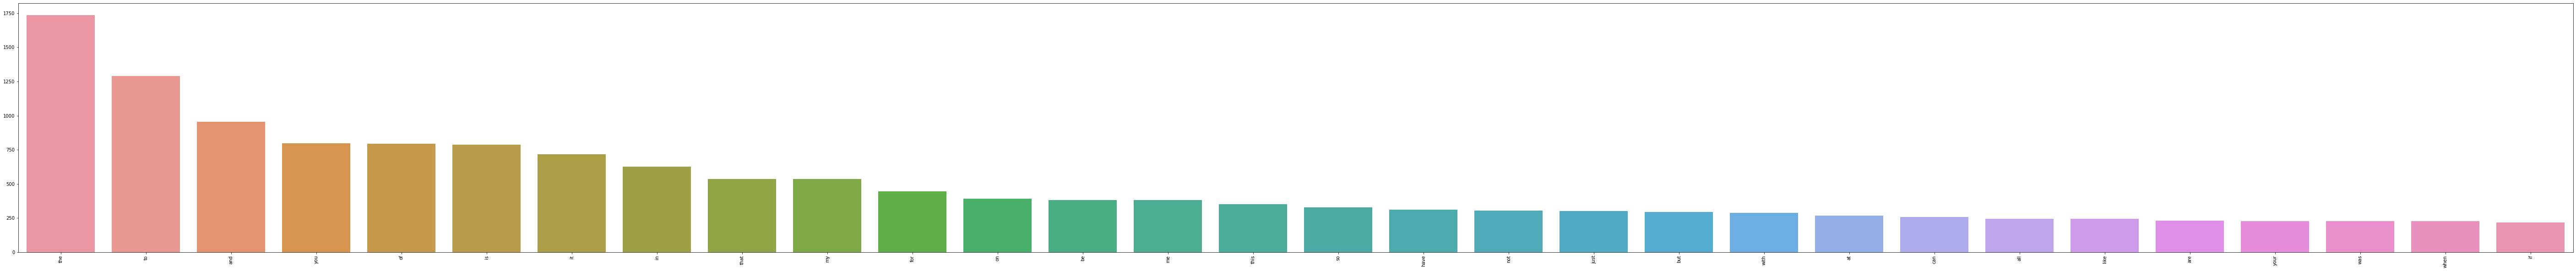

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

# train dataset
train_counts = count_vect.fit_transform(train_df.text)
train_counts_names  = count_vect.get_feature_names()
train_counts_sum = np.sum(train_counts.toarray(), axis=0).tolist()
train_counts_dict = dict(zip(train_counts_names, train_counts_sum))

train_counts_dict = {k: v for k, v in sorted(train_counts_dict.items(), key=lambda item: item[1], reverse=True)}
x = [k for k, v in train_counts_dict.items()][:30]
y = [v for k, v in train_counts_dict.items()][:30]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x, y=y)
g.set_xticklabels(x, rotation = 90);

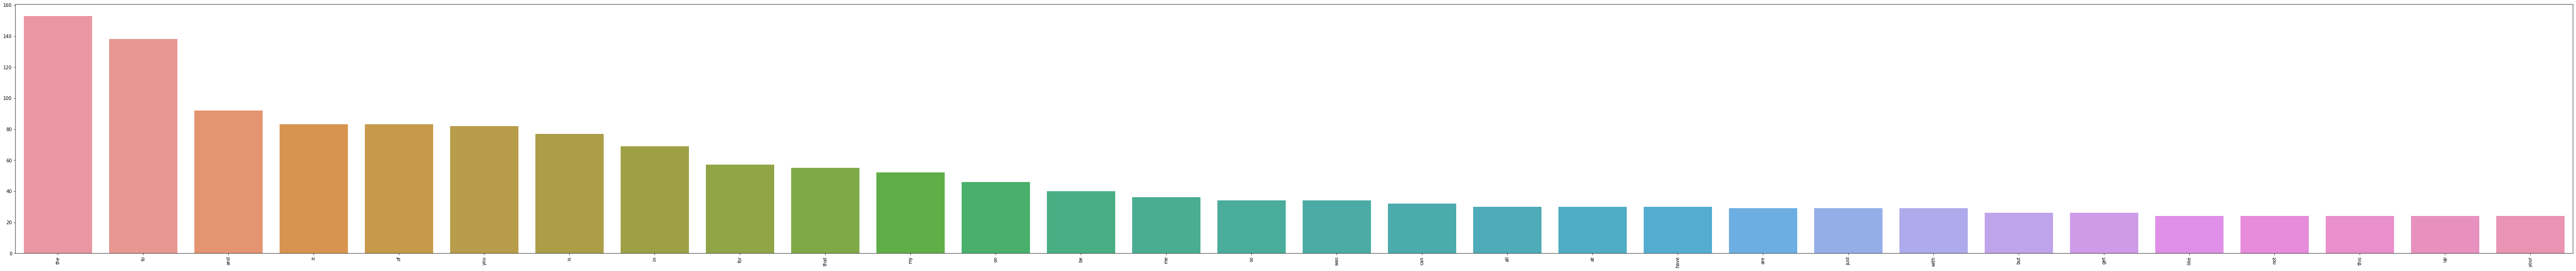

In [25]:
# test dataset
test_counts = count_vect.fit_transform(test_df.text)
test_counts_names  = count_vect.get_feature_names()
test_counts_sum = np.sum(test_counts.toarray(), axis=0).tolist()
test_counts_dict = dict(zip(test_counts_names, test_counts_sum))

test_counts_dict = {k: v for k, v in sorted(test_counts_dict.items(), key=lambda item: item[1], reverse=True)}
x = [k for k, v in test_counts_dict.items()][:30]
y = [v for k, v in test_counts_dict.items()][:30]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=x, y=y)
g.set_xticklabels(x, rotation = 90);

#### Exercise 2

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=1000)
tfidf_vect.fit(train_df.text)
train_data_tfidf = tfidf_vect.transform(train_df.text)
feature_names = tfidf_vect.get_feature_names()
feature_names[100:110]

['bitter',
 'black',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body',
 'boiling',
 'book']

#### Exercise 3
The confusion matrix indicates that how a model missclassify one class into other classes.

For each class, the elements on the diagonal are true positive (TP), the elements besides TP in each row are false positive (FP), and the elements besides TP in each column are false negative (FN). 

#### Exercise 4

In [30]:
import nltk
nltk.download('punkt')

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jimmy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Jimmy\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [32]:
from sklearn.naive_bayes import MultinomialNB

## build naive bayes model
NB_model = MultinomialNB()

## training
NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

In [33]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [34]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.65      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.79      0.71      0.75        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [35]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 15  5  9]
 [ 9 85  4 12]
 [10  7 56  6]
 [12 10  6 46]]


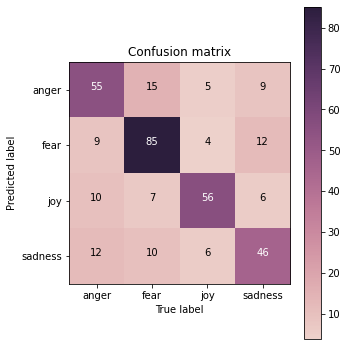

In [37]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

#### Exercise 5
Decision Tree model has better performance on training dataset but is outperformed by Naive Bayes model on test dataset. This result indicates that Decision Tree model might suffer from overfitting problem.

In [74]:
from sklearn.tree import DecisionTreeClassifier

best_acc_test = 0
for min_samples_leaf in range(1,21):
    for max_depth in range(50,100):
        ## build DecisionTree model
        DT_model = DecisionTreeClassifier(random_state=0, min_samples_leaf=min_samples_leaf, max_depth=max_depth)

        ## training!
        DT_model = DT_model.fit(X_train, y_train)

        ## predict!
        y_train_pred = DT_model.predict(X_train)
        y_test_pred = DT_model.predict(X_test)

        ## accuracy
        from sklearn.metrics import accuracy_score

        acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
        acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
        if acc_test > best_acc_test:
            best_acc_test = acc_test
            best_acc_train = acc_train
            best_min_samples_leaf = min_samples_leaf
            best_max_depth = max_depth      

print('training accuracy: {}'.format(round(best_acc_train, 2)))
print('testing accuracy: {}'.format(round(best_acc_test, 2)))
print('optimal min_samples_leaf={}, max_depth={}'.format(min_samples_leaf, max_depth))


training accuracy: 0.76
testing accuracy: 0.72
optimal min_samples_leaf=20, max_depth=99


By reducing maximum depth and fine-tuning min samples leaf, the overfitting problem can be alleviated.

#### Exercise 6
The example suffers from overfitting since the training loss decreases and accuracy increases but validation loss increases and accuracy decreases.

#### Exercise 7
We can aggregate these word vectors into matrices that represents the sentence data. 

These sentence representation can be seen as an image data and trained with deep learning model such as CNN.

#### Exercise 8

In [76]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

target_words = happy_words + angry_words + sad_words + fear_words

load ok


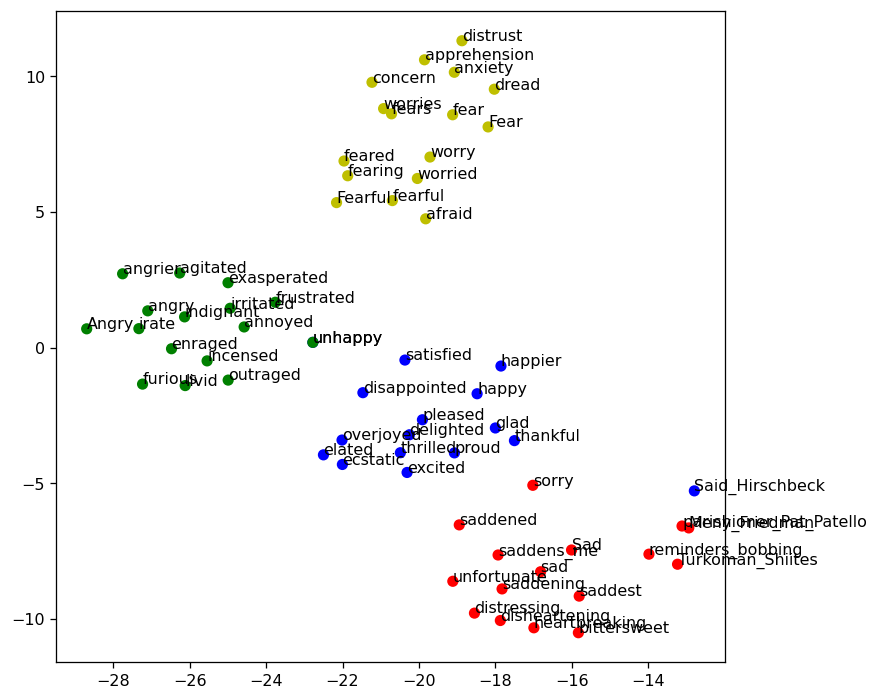

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

### Part II
kaggle.py and bert_classification.py correspond to two methods I tried.

### Part III
Two kinds of methods were adopted for emotion recognition in Tweet. For both method, I only did tokenizing for data preprocessing since we expected model would be powerful enough without any handcrafted steps.

The first one is pretrained Glove embedding + bidirectional LSTM. During implementing this method, I've tried to modify the dimension of embedding and hidden layers' dimensions of LSTM. Besides, I've also attempted to add an attention layer after LSTM. However, these modifications seems not to have much influence on perforance. This method achieve about 45%. After discussing with my teemmates, we found that pretrained word embedding might not be the most suitable for our dataset, and the model could gain significant improvement by fine-tuning word embedding.

The second method is transformer-based model. I followed the most famous transformers open source for NLP, HuggingFace, and fine-tuned their pretrained models for our task. I've attempted two transformer variants, DistilBERT and XLNet. DistilBERT is the light version of BERT, it utilizes the distillation concept that a smaller and faster BERT can learn from original BERT and retain the performance. XLNet applies permutation language modeling and two-stream self-attention techniques to achieve autoencoding concept used in BERT. These techniques can avoid implementing autoencoding with mask, which can not be used during fine-tuning. Although those transformer-based models are really powerful, it take too much time on training and inference.

During implementing both methods, I found that all models converged quite early while training and tended to overfit. I think it might indicate that the diversity of training dataset is not enough.